### Prof. Pedram Jahangiry

You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/Deep_forecasting-USU/blob/main/Lectures%20and%20codes/Module%205-%20Machine%20Learning%20Forecasting/Module5-DT_intuition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center) 


## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/PJalgotrader/Deep_forecasting-USU/main/data/airline_passengers.csv", index_col="Month")
data.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [4]:
# Create lag features
data['Lag_1'] = data['Passengers'].shift(1)
data['Lag_2'] = data['Passengers'].shift(2)

data.head()

,Passengers,Lag_1,Lag_2
Month,,,
1949-01,112,NaN,NaN
1949-02,118,112.0,NaN
1949-03,132,118.0,112.0
1949-04,129,132.0,118.0
1949-05,121,129.0,132.0


In [5]:
# Drop NA values created by lag features
data.dropna(inplace=True)
data.head()

,Passengers,Lag_1,Lag_2
Month,,,
1949-03,132,118.0,112.0
1949-04,129,132.0,118.0
1949-05,121,129.0,132.0
1949-06,135,121.0,129.0
1949-07,148,135.0,121.0


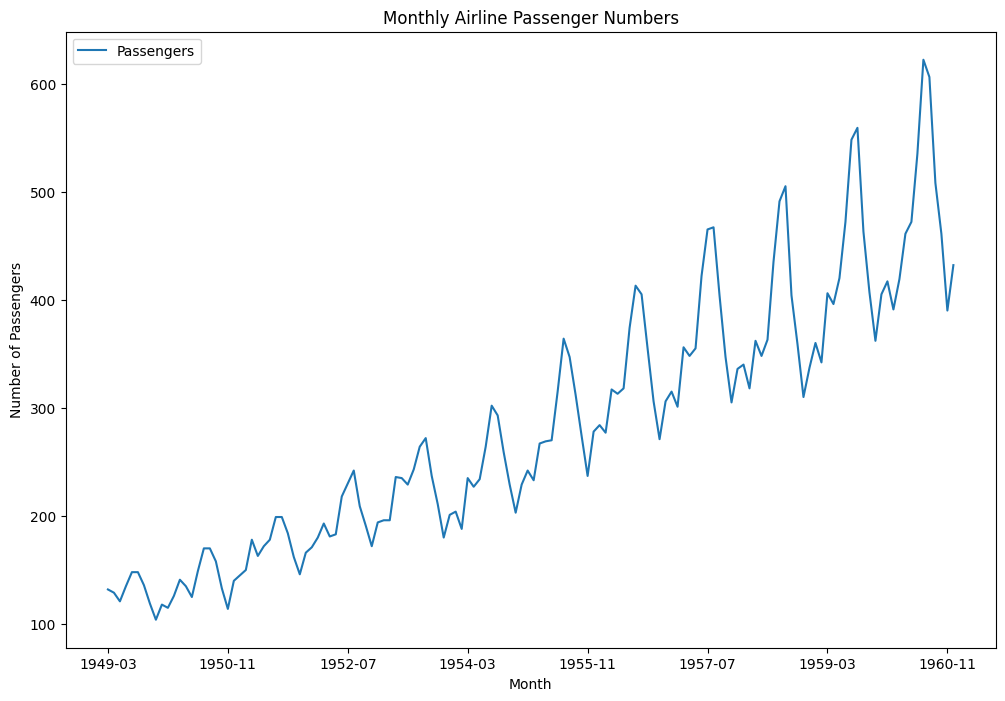

In [6]:
# plot the passenger data
data['Passengers'].plot(figsize=(12, 8))
plt.title('Monthly Airline Passenger Numbers')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()
plt.show()


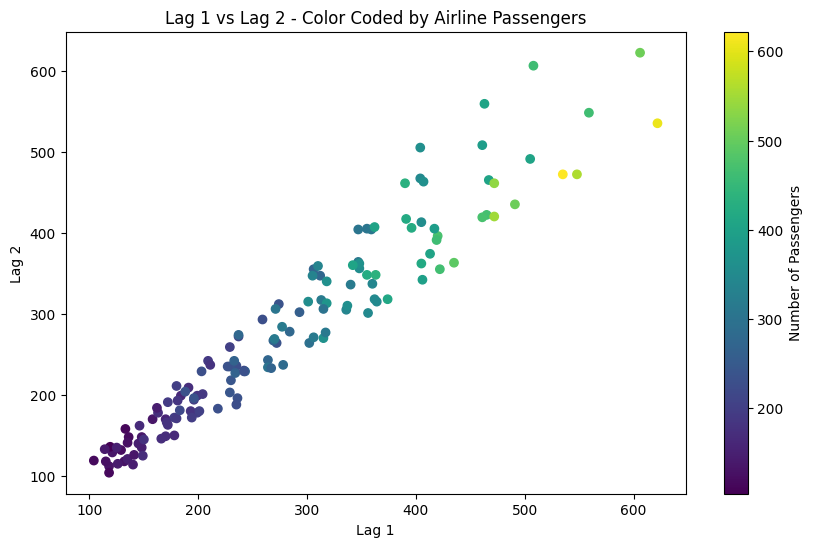

In [7]:
# Plot scatterplot of Lag 1 and Lag 2 color coded by Airline Passengers
plt.figure(figsize=(10, 6))
plt.scatter(data['Lag_1'], data['Lag_2'], c=data['Passengers'], cmap='viridis')
plt.title('Lag 1 vs Lag 2 - Color Coded by Airline Passengers')
plt.xlabel('Lag 1')
plt.ylabel('Lag 2')
plt.colorbar(label='Number of Passengers')
plt.show()

## Decisiont Tree timeseries regression

In [8]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Prepare the data for the model
X = data[['Lag_1', 'Lag_2']]
y = data['Passengers']

In [9]:
dt_model = DecisionTreeRegressor(max_depth=2)
dt_model.fit(X, y)

# making predictions
data['DT_Predictions'] = dt_model.predict(X)


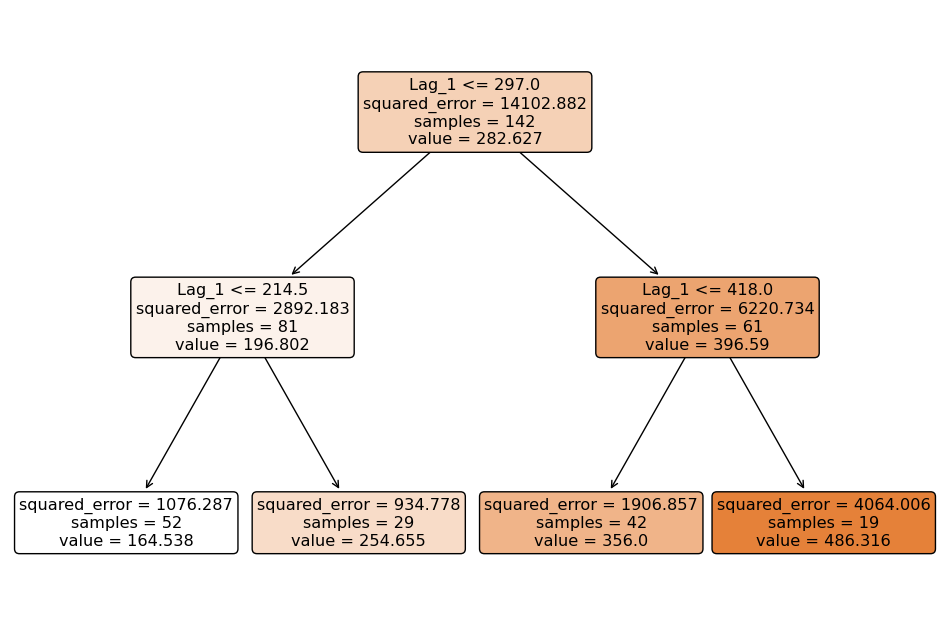

In [10]:
# visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=X.columns, filled=True, rounded=True)
plt.show()

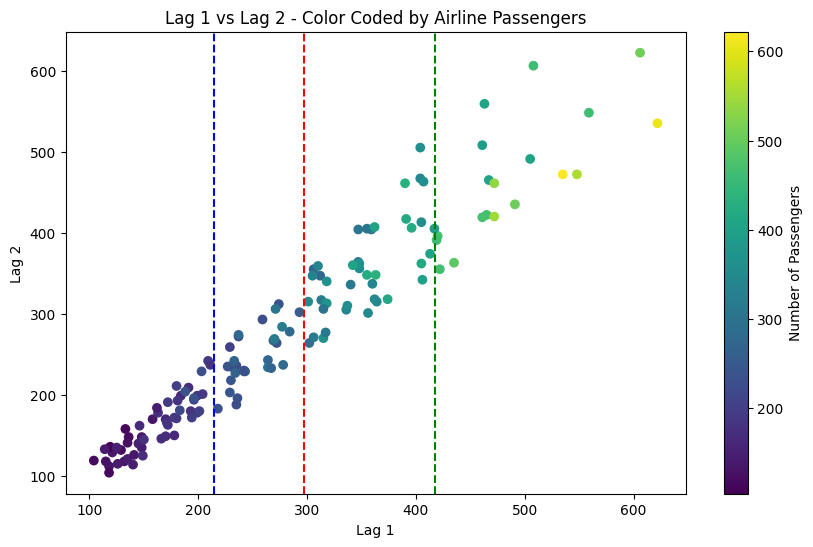

In [11]:
# let's add lag_1 cut off points to the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Lag_1'], data['Lag_2'], c=data['Passengers'], cmap='viridis')

# Add the decision tree cut off points
plt.axvline(x=297, color='red', linestyle='--')
plt.axvline(x=214.5, color='blue', linestyle='--')
plt.axvline(x=418, color='green', linestyle='--')


plt.title('Lag 1 vs Lag 2 - Color Coded by Airline Passengers')
plt.xlabel('Lag 1')
plt.ylabel('Lag 2')
plt.colorbar(label='Number of Passengers')
plt.show()


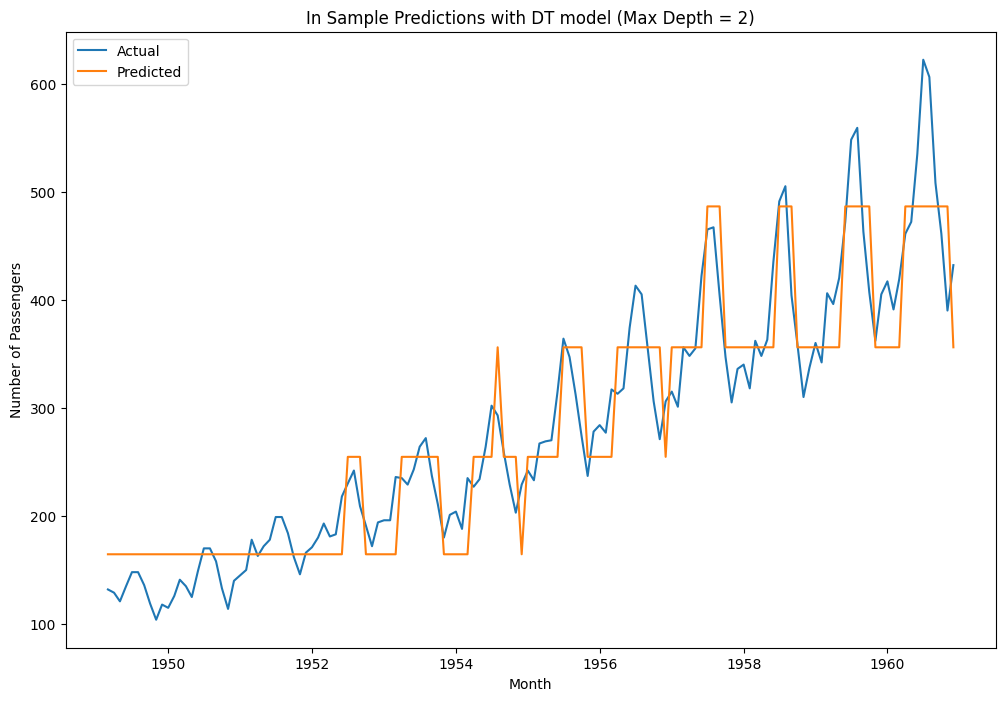

In [12]:
# now let's visualize the in sample predictions
data.index = pd.to_datetime(data.index)

plt.figure(figsize=(12, 8))
plt.plot(data.index, data['Passengers'], label='Actual')
plt.plot(data.index, data['DT_Predictions'], label='Predicted')
plt.title(f'In Sample Predictions with DT model (Max Depth = {dt_model.max_depth})')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()


Go back and increase the depth to 10. What do you see? 

## Random Forest timeseries regression

In [13]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, bootstrap=True)
rf_model.fit(X, y)

RandomForestRegressor()

In [14]:
# make predictions
data['RF_Predictions'] = rf_model.predict(X)
data.head()

,Passengers,Lag_1,Lag_2,DT_Predictions,RF_Predictions
Month,,,,,
1949-03-01,132,118.0,112.0,164.538462,129.01
1949-04-01,129,132.0,118.0,164.538462,131.48
1949-05-01,121,129.0,132.0,164.538462,126.57
1949-06-01,135,121.0,129.0,164.538462,131.61
1949-07-01,148,135.0,121.0,164.538462,141.47


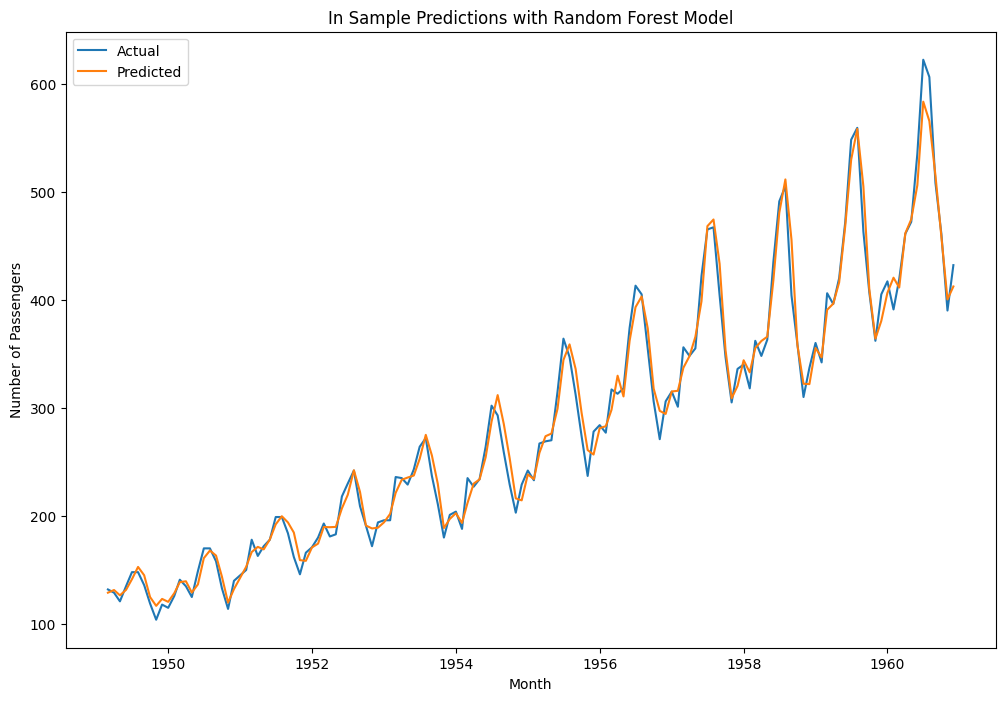

In [15]:
# visualize the in sample predictions
plt.figure(figsize=(12, 8))
plt.plot(data.index, data['Passengers'], label='Actual')
plt.plot(data.index, data['RF_Predictions'], label='Predicted')
plt.title('In Sample Predictions with Random Forest Model')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()


wait a sec, the random forest is underperforming one single tree with depth=10. What is going on here? hint: go back and turn of the bootstrap!!! 

In [16]:
# depth of the trees
rf_model.estimators_[0].tree_.max_depth

11

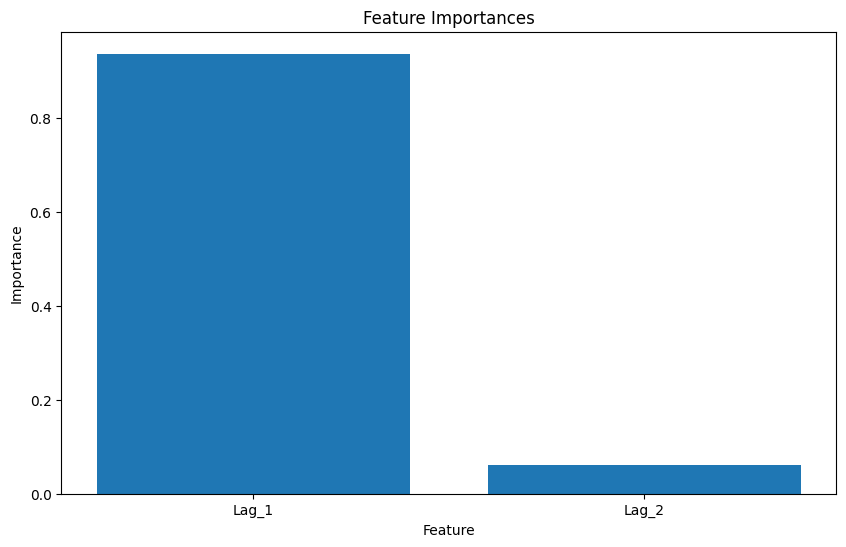

In [17]:
# Let's do feature importance
importances = rf_model.feature_importances_

# plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(X.columns, importances)
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()



In [18]:
# Now let's do xgboost
from xgboost import XGBRegressor

xgboost_model = XGBRegressor(n_estimators=100)
xgboost_model.fit(X, y)

# make predictions
data['XGBoost_Predictions'] = xgboost_model.predict(X)
data.head()


,Passengers,Lag_1,Lag_2,DT_Predictions,RF_Predictions,XGBoost_Predictions
Month,,,,,,
1949-03-01,132,118.0,112.0,164.538462,129.01,131.753448
1949-04-01,129,132.0,118.0,164.538462,131.48,129.078384
1949-05-01,121,129.0,132.0,164.538462,126.57,121.399040
1949-06-01,135,121.0,129.0,164.538462,131.61,134.985535
1949-07-01,148,135.0,121.0,164.538462,141.47,147.379028


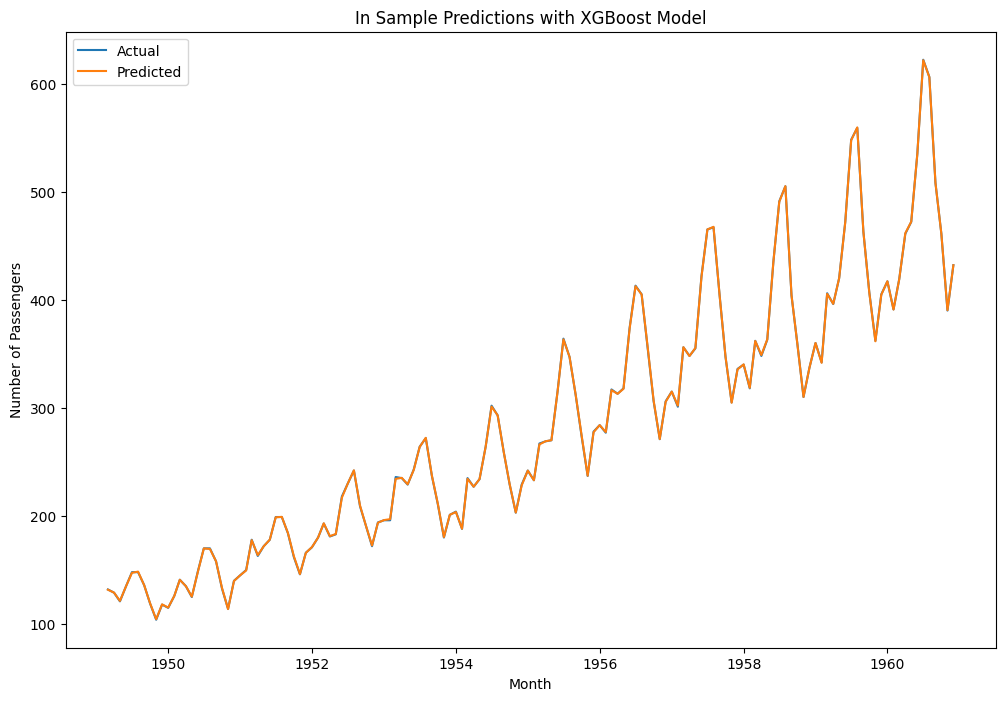

In [19]:
# plot the in sample predictions
plt.figure(figsize=(12, 8))
plt.plot(data.index, data['Passengers'], label='Actual')
plt.plot(data.index, data['XGBoost_Predictions'], label='Predicted')
plt.title('In Sample Predictions with XGBoost Model')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()


In [20]:
# the depth of xgboost trees
xgboost_model.get_booster().get_dump()[0].count('\t')

120

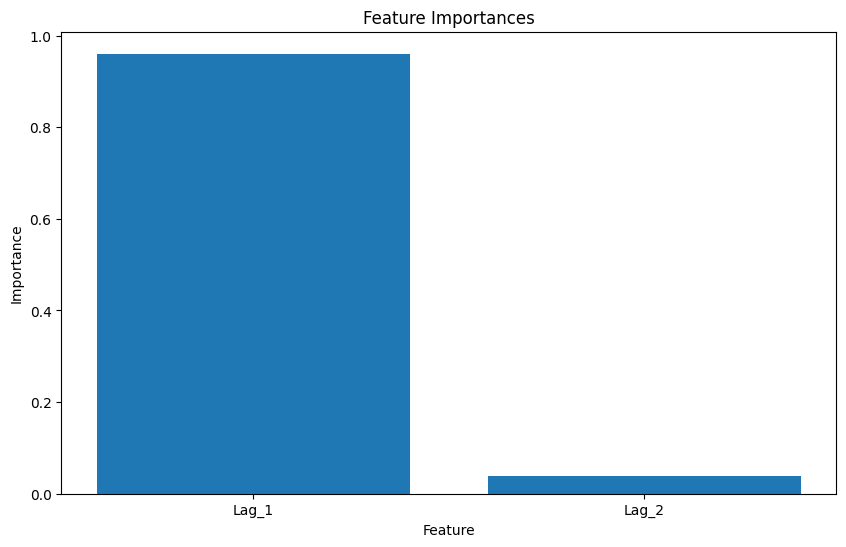

In [21]:
# visualizing the feature importance
importances = xgboost_model.feature_importances_

# plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(X.columns, importances)
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()



# Forecasting into the future


In [22]:
data.head()

,Passengers,Lag_1,Lag_2,DT_Predictions,RF_Predictions,XGBoost_Predictions
Month,,,,,,
1949-03-01,132,118.0,112.0,164.538462,129.01,131.753448
1949-04-01,129,132.0,118.0,164.538462,131.48,129.078384
1949-05-01,121,129.0,132.0,164.538462,126.57,121.399040
1949-06-01,135,121.0,129.0,164.538462,131.61,134.985535
1949-07-01,148,135.0,121.0,164.538462,141.47,147.379028


In [23]:
# Define a function to forecast into the future

h = 36 # number of steps to forecast into the future 
def forecast_future(dt_model, data, steps=h):
    # Starting with the last known lag values
    last_lag1 = data['Lag_1'].iloc[-1]
    last_lag2 = data['Lag_2'].iloc[-1]
    
    # To store future predictions
    future_predictions = []
    
    for step in range(steps):
        # Format the input with the correct column names
        input_df = pd.DataFrame([[last_lag1, last_lag2]], columns=['Lag_1', 'Lag_2'])
        
        # Predict the next value
        next_value_pred = dt_model.predict(input_df)[0]
        
        # Update lag values
        last_lag2 = last_lag1
        last_lag1 = next_value_pred
        
        future_predictions.append(next_value_pred)
    
    return future_predictions

In [24]:
# Forecast h months into the future
future_preds = forecast_future(rf_model, data, steps=h)

# Create a date range for the future predictions
last_date = data.index[-1]
future_dates = pd.date_range(start=last_date + pd.offsets.MonthBegin(1), periods=h, freq='M')


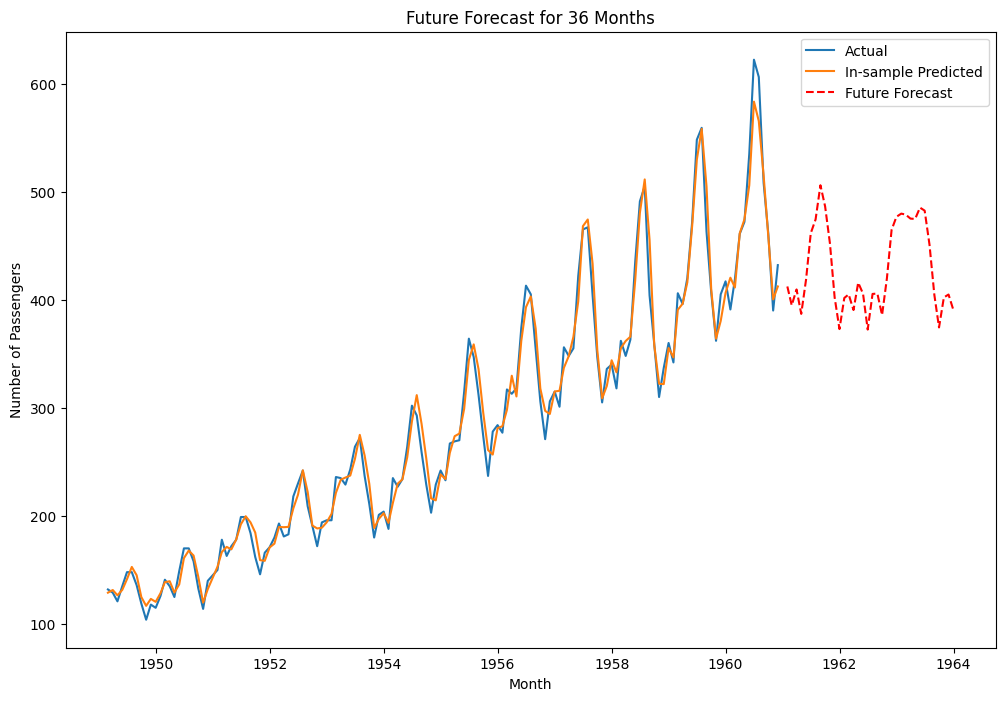

In [25]:

# Visualize the forecast along with the actual data and in-sample predictions
plt.figure(figsize=(12, 8))
plt.plot(data.index, data['Passengers'], label='Actual')
plt.plot(data.index, data['RF_Predictions'], label='In-sample Predicted')
plt.plot(future_dates, future_preds, label='Future Forecast', linestyle='--', color='red')
plt.title(f'Future Forecast for {h} Months')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()



When forecasting into the future, especially over long horizons like 36 months, CART models (Decision Trees, Random Forests, XGBoost, etc.) often struggle to capture and maintain trend and seasonality in time series data for several reasons:

1. **Lack of Explicit Trend and Seasonality Modeling**:
CART models do not inherently model trend and seasonality, which are fundamental components of time series data. These models make predictions based on the values of input features, without an explicit mechanism to account for the underlying time series components like trend and seasonality.

2. **Recursive Forecasting Limitations**:
When using CART models for multi-step forecasting by recursively using predictions as inputs for future predictions, errors can accumulate quickly. This accumulation of errors tends to dilute the trend and seasonality captured in the forecasts.

3. **Feature Representation**:
The ability of CART models to forecast time series data relies heavily on the features provided to them. If lagged variables and other engineered features (like rolling averages, time indicators for seasonality, etc.) are not adequately capturing the trend and seasonality, the model will not be able to project these patterns into the future accurately. This limitation is particularly pronounced when the forecast horizon extends beyond the immediate future. 

4. **Stationarity Assumption**:
Many machine learning models, including CART models, perform best when the input data is stationary, meaning it has constant statistical properties over time.


**Solutions**: 
1. Feature engineering, example increasing lag numbers (doesn't help if strong trend and seasonality exist)
2. Detrending and Deseasonalizing 


### Increasing lag numbers

In [26]:
# starting with increasing the lag numbers 

data2 = pd.read_csv("https://raw.githubusercontent.com/PJalgotrader/Deep_forecasting-USU/main/data/airline_passengers.csv", index_col="Month")

# Create lag features with a for loop for 12 lags
for i in range(1, 13):
    data2[f'Lag_{i}'] = data2['Passengers'].shift(i)    

data2.dropna(inplace=True)
data2.head()


,Passengers,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Lag_8,Lag_9,Lag_10,Lag_11,Lag_12
Month,,,,,,,,,,,,,
1950-01,115,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0,132.0,118.0,112.0
1950-02,126,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0,132.0,118.0
1950-03,141,126.0,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0,132.0
1950-04,135,141.0,126.0,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0
1950-05,125,135.0,141.0,126.0,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0


In [27]:
# create a quick DT model 
X = data2.drop('Passengers', axis=1)
y = data2['Passengers']

dt_model2 = DecisionTreeRegressor(max_depth=20)
dt_model2.fit(X, y)

# create a quick RF model
rf_model2 = RandomForestRegressor(n_estimators=100, bootstrap=False)
rf_model2.fit(X, y)


# make predictions
data2['DT_Predictions'] = dt_model2.predict(X)
data2['RF_Predictions'] = rf_model2.predict(X)

data2.head()

,Passengers,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Lag_8,Lag_9,Lag_10,Lag_11,Lag_12,DT_Predictions,RF_Predictions
Month,,,,,,,,,,,,,,,
1950-01,115,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0,132.0,118.0,112.0,115.0,115.0
1950-02,126,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0,132.0,118.0,126.0,126.0
1950-03,141,126.0,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0,132.0,141.0,141.0
1950-04,135,141.0,126.0,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0,135.0,135.0
1950-05,125,135.0,141.0,126.0,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,125.0,125.0


In [29]:
def forecast_with_12_lags(model, data, steps=36):
    """
    Forecast future values using a model trained with 12 lagged features.
    
    Parameters:
    - model: The trained machine learning model (e.g., DecisionTreeRegressor).
    - data: DataFrame containing the time series and lagged features.
    - steps: Number of future steps to forecast.
    
    Returns:
    - A list of forecasted values.
    """
    # Initialize the list of forecasted values
    forecasted_values = []
    
    # Start with the last known lag values
    last_known_lags = data.iloc[-1, -12:].values
    
    for step in range(steps):
        # Convert the current lags into a DataFrame with appropriate column names
        current_lags_df = pd.DataFrame([last_known_lags], columns=[f'Lag_{i}' for i in range(1, 13)])
        
        # Predict the next value using the model
        next_value = model.predict(current_lags_df)[0]
        
        # Append the forecasted value
        forecasted_values.append(next_value)
        
        # Update the lag values for the next prediction
        last_known_lags = np.roll(last_known_lags, -1)
        last_known_lags[-1] = next_value
    
    return forecasted_values


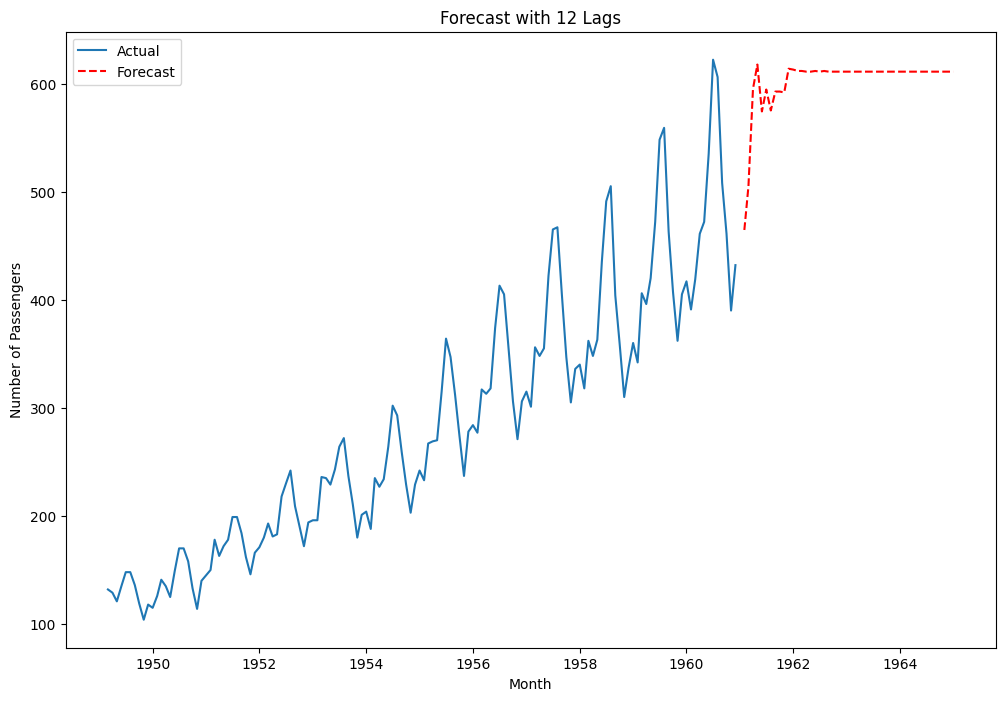

In [30]:
# Example usage:
h=48
forecasted_values = forecast_with_12_lags(rf_model2, data2, steps=h)

# Visualize the forecast
future_dates = pd.date_range(start=data.index[-1] + pd.offsets.MonthBegin(1), periods=h, freq='M')
plt.figure(figsize=(12, 8))
plt.plot(data.index, data['Passengers'], label='Actual')
plt.plot(future_dates, forecasted_values, label='Forecast', linestyle='--', color='red')

plt.title('Forecast with 12 Lags')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

### Detrending and deseasonalizing and transforming the data

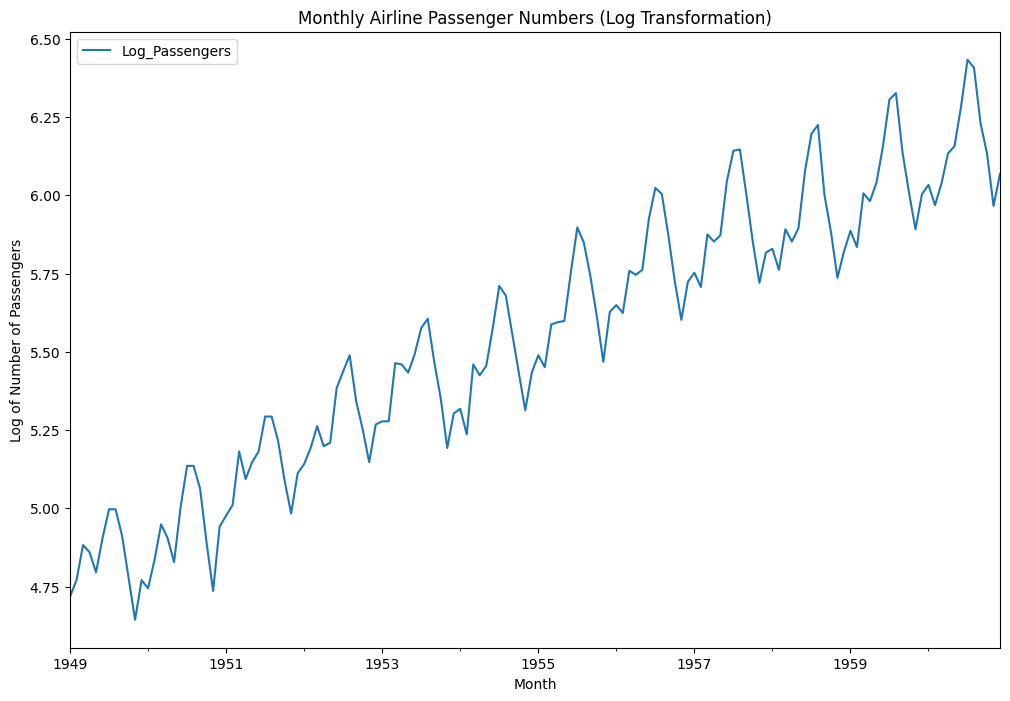

In [31]:
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import pandas as pd

# importing the data
data = pd.read_csv("https://raw.githubusercontent.com/PJalgotrader/Deep_forecasting-USU/main/data/airline_passengers.csv", index_col="Month")
data.index = pd.to_datetime(data.index)

# let's do log transformation first 
data['Log_Passengers'] = np.log(data['Passengers'])

#plotting the log passengers
data['Log_Passengers'].plot(figsize=(12, 8))
plt.title('Monthly Airline Passenger Numbers (Log Transformation)')
plt.xlabel('Month')
plt.ylabel('Log of Number of Passengers')
plt.legend()
plt.show()


In [32]:

# Step 1: Detrend and Deseasonalize
decomposition = seasonal_decompose(data['Log_Passengers'], model='additive', period=12)
data['deseasonalized'] = data['Log_Passengers'] - decomposition.seasonal - decomposition.trend

# Create lag features on the deseasonalized data
data['Lag_1'] = data['deseasonalized'].shift(1)
data['Lag_2'] = data['deseasonalized'].shift(2)
data.dropna(inplace=True)

data.head()

,Passengers,Log_Passengers,deseasonalized,Lag_1,Lag_2
Month,,,,,
1949-09-01,136,4.912655,0.001223,-0.048415,-0.050884
1949-10-01,119,4.779123,0.003156,0.001223,-0.048415
1949-11-01,104,4.644391,0.005749,0.003156,0.001223
1949-12-01,118,4.770685,0.011045,0.005749,0.003156
1950-01-01,115,4.744932,-0.039093,0.011045,0.005749


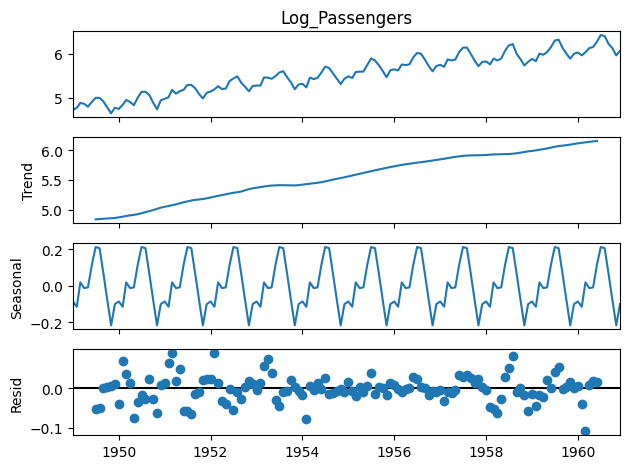

In [33]:
# visualize the decomposition
decomposition.plot()
plt.show()

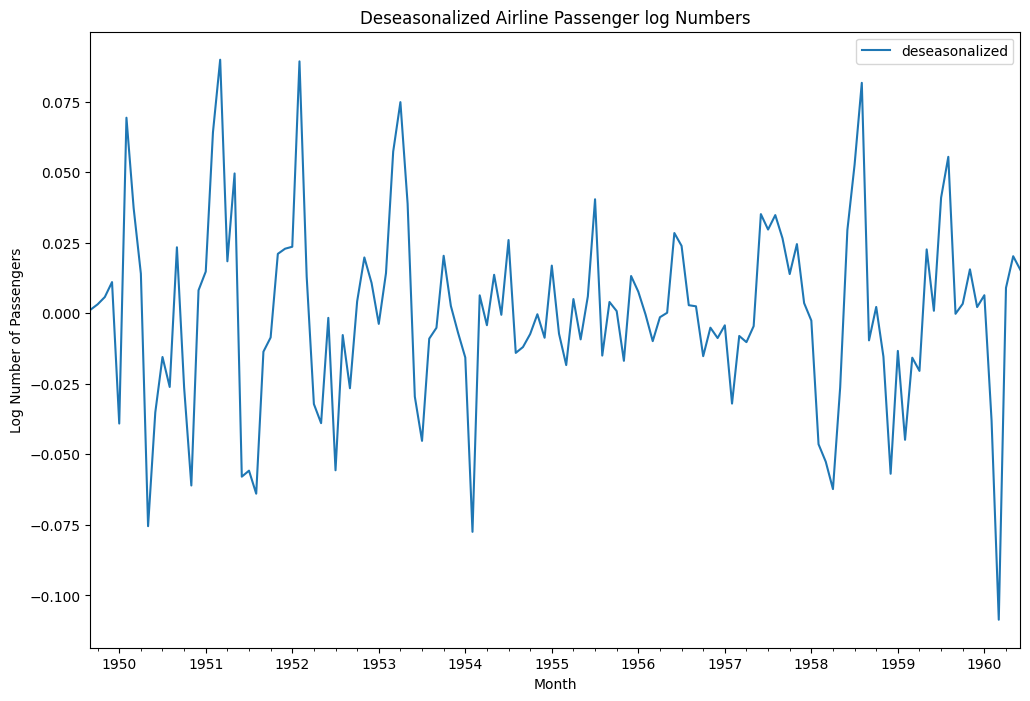

In [34]:
# plot the data to see the deseasonalized data
data['deseasonalized'].plot(figsize=(12, 8))
plt.title('Deseasonalized Airline Passenger log Numbers')
plt.xlabel('Month')
plt.ylabel('Log Number of Passengers')
plt.legend()
plt.show()

In [35]:
data.head()

,Passengers,Log_Passengers,deseasonalized,Lag_1,Lag_2
Month,,,,,
1949-09-01,136,4.912655,0.001223,-0.048415,-0.050884
1949-10-01,119,4.779123,0.003156,0.001223,-0.048415
1949-11-01,104,4.644391,0.005749,0.003156,0.001223
1949-12-01,118,4.770685,0.011045,0.005749,0.003156
1950-01-01,115,4.744932,-0.039093,0.011045,0.005749


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 130 entries, 1949-09-01 to 1960-06-01
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Passengers      130 non-null    int64  
 1   Log_Passengers  130 non-null    float64
 2   deseasonalized  130 non-null    float64
 3   Lag_1           130 non-null    float64
 4   Lag_2           130 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 6.1 KB


In [37]:
# Step 2: Model Training
X = data[['Lag_1', 'Lag_2']]
y = data['deseasonalized']

rf_dt_ds_model = RandomForestRegressor(n_estimators=100, bootstrap=False)
rf_dt_ds_model.fit(X, y)


RandomForestRegressor(bootstrap=False)

In [38]:
# Step 3: Forecasting (starting with in-sample predictions)
y_pred = rf_dt_ds_model.predict(X)

# Step 4: Retrending and Reseasonalizing
# Add back the trend and seasonal components
data['RF_DT_DS_Predictions'] =  y_pred + decomposition.trend.reindex(data.index) + decomposition.seasonal.reindex(data.index)
data.head()

,Passengers,Log_Passengers,deseasonalized,Lag_1,Lag_2,RF_DT_DS_Predictions
Month,,,,,,
1949-09-01,136,4.912655,0.001223,-0.048415,-0.050884,4.912655
1949-10-01,119,4.779123,0.003156,0.001223,-0.048415,4.779123
1949-11-01,104,4.644391,0.005749,0.003156,0.001223,4.644391
1949-12-01,118,4.770685,0.011045,0.005749,0.003156,4.770685
1950-01-01,115,4.744932,-0.039093,0.011045,0.005749,4.744932


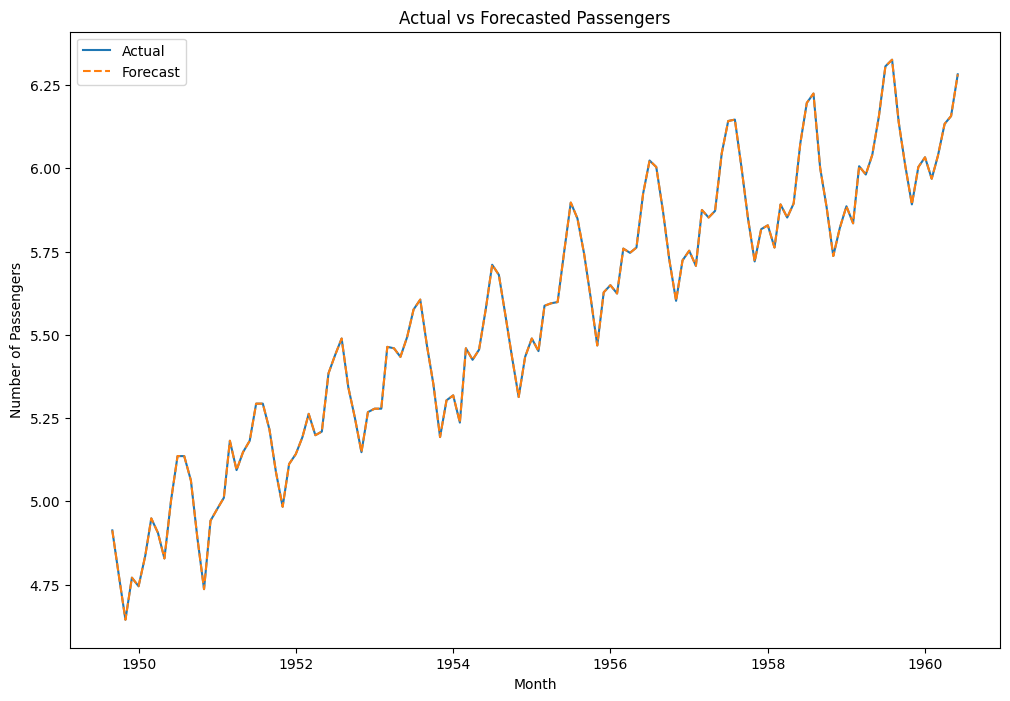

In [39]:
# Visualization
plt.figure(figsize=(12, 8))
plt.plot(data.index, data['Log_Passengers'], label='Actual')
plt.plot(data.index, data['RF_DT_DS_Predictions'], label='Forecast', linestyle='--')
plt.title('Actual vs Forecasted Passengers')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

In [40]:
# now finally let's forecast into the future
h = 100
def forecast_future_ds(model, data, decomposition, steps=36):
    # Starting with the last known lag values
    last_lag1 = data['Lag_1'].iloc[-1]
    last_lag2 = data['Lag_2'].iloc[-1]
    
    # To store future predictions
    future_predictions = []
    
    # Fill NaN values in the trend and seasonal components, if any, at the end
    trend = decomposition.trend.dropna()
    seasonal = decomposition.seasonal.dropna()
    
    # Assuming the seasonal cycle is 12 months, we can repeat the last known cycle
    seasonal_cycle = seasonal[-12:].tolist()
    
    # We can take the last known trend change to extrapolate the trend
    trend_diff = trend.iloc[-1] - trend.iloc[-2]
    last_known_trend = trend.iloc[-1]
    
    for step in range(steps):
        # Format the input with the correct column names
        input_df = pd.DataFrame([[last_lag1, last_lag2]], columns=['Lag_1', 'Lag_2'])
        
        # Predict the next value
        next_value_pred = model.predict(input_df)[0]
        
        # Update lag values
        last_lag2 = last_lag1
        last_lag1 = next_value_pred
        
        # Add back the trend and seasonal components
        # Extrapolate the trend
        next_trend = last_known_trend + trend_diff * (step + 1)
        
        # Use the corresponding seasonal component
        next_seasonal = seasonal_cycle[step % 12]
        
        next_value_pred += next_trend + next_seasonal
        
        future_predictions.append(next_value_pred)
    
    return future_predictions

In [41]:
data.head()

,Passengers,Log_Passengers,deseasonalized,Lag_1,Lag_2,RF_DT_DS_Predictions
Month,,,,,,
1949-09-01,136,4.912655,0.001223,-0.048415,-0.050884,4.912655
1949-10-01,119,4.779123,0.003156,0.001223,-0.048415,4.779123
1949-11-01,104,4.644391,0.005749,0.003156,0.001223,4.644391
1949-12-01,118,4.770685,0.011045,0.005749,0.003156,4.770685
1950-01-01,115,4.744932,-0.039093,0.011045,0.005749,4.744932


In [42]:
# Forecast h months into the future
future_preds = forecast_future_ds(rf_dt_ds_model, data, decomposition, steps=h)

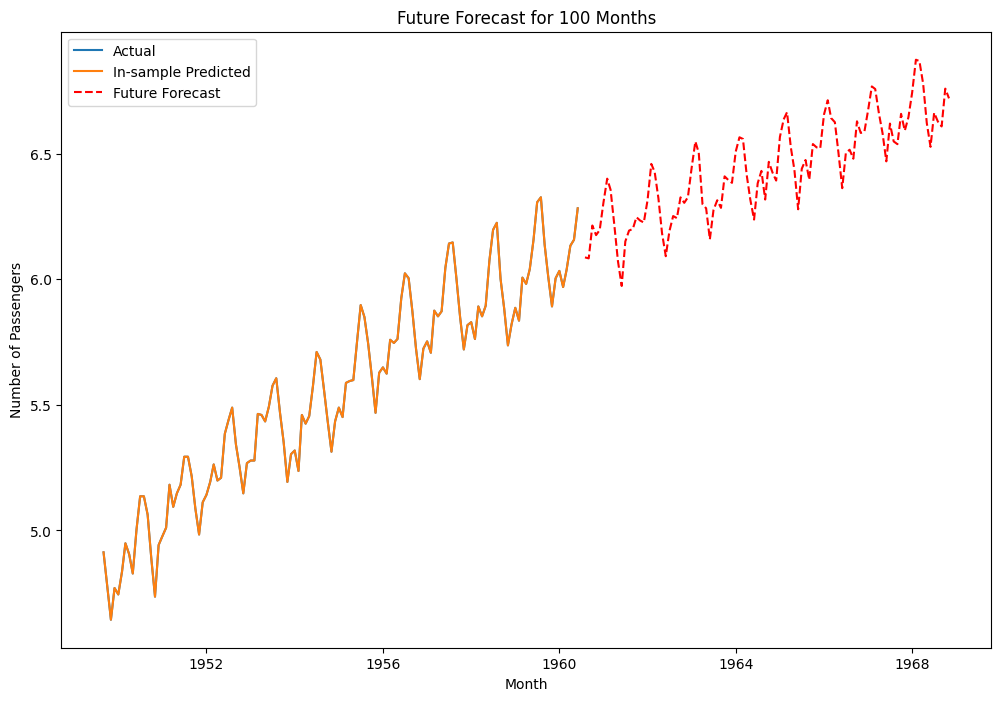

In [43]:
# visualizing the forecasts into the future
future_dates = pd.date_range(start=data.index[-1] + pd.offsets.MonthBegin(1), periods=h, freq='M')
plt.figure(figsize=(12, 8))
plt.plot(data.index, data['Log_Passengers'], label='Actual')
plt.plot(data.index, data['RF_DT_DS_Predictions'], label='In-sample Predicted')
plt.plot(future_dates, future_preds, label='Future Forecast', linestyle='--', color='red')
plt.title(f'Future Forecast for {h} Months')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()


# Done!